Difference formulas for derivatives:
<br>$f'(x) = (f(x + h) − f(x))/h−h/2f''(ξ)$, Forward difference
<br>$f'(x) = (f(x) − f(x − h))/h+h/2f''(ξ)$, Backward difference
<br>$f'(x) = (f(x + h) − f(x − h))/2h−h2/6f'''(ξ)$. Central difference
<br>$f''(x) = (f(x + h) − 2f(x) + f(x − h))/h^2−h^2/12f(4)(ξ)$, Central difference

2D-Laplace Equation
<br>$∂^2u/∂x^2 + ∂^2u/∂y^2 = 0$

0.01 0.01


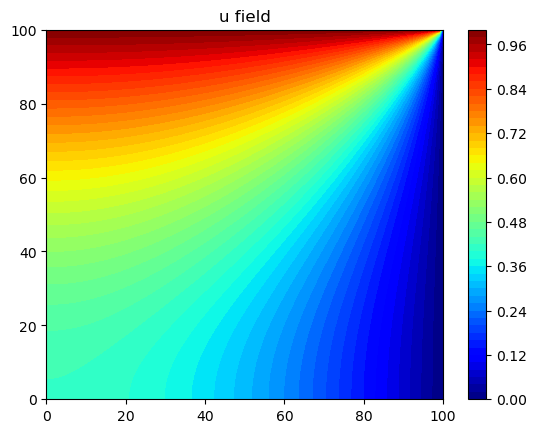

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#the Laplace equation is the steady-state heat equation
def laplace_solver_2d(n, m, dx, dy, tolerance):
    # Initialize the solution matrix with boundary conditions
    u = np.zeros((n+1, m+1))
    u[-1, :] = 1.0 
    u[:, -1] = 0.0
    
    X, Y = np.meshgrid(np.arange(n+1), np.arange(m+1))
    # Iterate until the solution converges
    error = tolerance + 1
    while error > tolerance:
        un = u.copy()
        u[1:-1, 1:-1] = 0.25*((un[1:-1, :-2] + un[1:-1, 2:]) + (un[:-2, 1:-1] + un[2:, 1:-1]))
        u[0,0:-1] = 0.25 * ((2.0 * un[1,0:-1]) + (un[0,0:-1]  + un[0,0:-1]))
        u[0:-1,0] = 0.25 * ((2.0 * un[0:-1,1]) + (un[0:-1,0]  + un[0:-1, 0]))
        error = np.max(np.abs(u - un))
    return u

# Test the solver 
n, m = 100,100
dx, dy = 1.0 / n, 1.0 / m
tolerance = 1e-5
u = laplace_solver_2d(n, m, dx, dy, tolerance)

colorinterpolation = 50
colourMap = plt.cm.jet
X, Y = np.meshgrid(np.arange(n+1), np.arange(m+1))
plt.title("u field")
plt.contourf(X, Y, u, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()